import libraries


In [1]:
import pandas as pd
import numpy as np


read data

In [2]:
data = pd.read_csv('magic_gamma_telescope04_.csv')

In [3]:
data.head()

,flength,fwidth,fsize,fconc,fconc1,fsym,fm3long,fm3trans,falpha,dist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [4]:
data.describe()

,flength,fwidth,fsize,fconc,fconc1,fsym,fm3long,fm3trans,falpha,dist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


In [5]:
data.isna().sum()

flength     0
fwidth      0
fsize       0
fconc       0
fconc1      0
fsym        0
fm3long     0
fm3trans    0
falpha      0
dist        0
class       0
dtype: int64

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()


In [8]:
y = data.iloc[:,-1]

In [9]:
y

0        g
1        g
2        g
3        g
4        g
        ..
19015    h
19016    h
19017    h
19018    h
19019    h
Name: class, Length: 19020, dtype: object

In [10]:
y.nunique

<bound method IndexOpsMixin.nunique of 0        g
1        g
2        g
3        g
4        g
        ..
19015    h
19016    h
19017    h
19018    h
19019    h
Name: class, Length: 19020, dtype: object>

In [11]:
y = pd.get_dummies(y,drop_first=True)

In [12]:
y

,h
0,0
1,0
2,0
3,0
4,0
...,...
19015,1
19016,1
19017,1
19018,1


In [13]:
x = data.iloc[:,0:10]

In [14]:
x

,flength,fwidth,fsize,fconc,fconc1,fsym,fm3long,fm3trans,falpha,dist
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620
...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166


Train-Test Splite

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 40, stratify = y)

In [17]:
y_test

,h
2750,0
6645,0
13035,1
14820,1
9017,0
...,...
15494,1
10856,0
14182,1
5416,0


In [18]:
X_train = pd.DataFrame(scaler.fit_transform(X_train))

In [19]:
X_train

,0,1,2,3,4,5,6,7,8,9
0,1.150192,-0.256550,0.364074,-0.454536,-0.382775,-2.452750,0.736241,-0.812475,-0.897084,1.051046
1,-0.733952,-0.309787,-0.362522,0.275262,0.087844,-0.253419,-0.505496,-0.600410,-0.405080,-1.370276
2,-0.455193,-0.201814,0.181314,-0.434294,-0.530580,0.183191,0.228075,-0.446418,-0.910101,-0.268704
3,2.102133,2.169045,2.466441,-1.592997,-1.390208,1.312240,-2.760826,1.998574,2.328035,2.441819
4,1.314124,0.007860,0.647731,-1.009816,-0.987598,1.661544,1.865189,0.819260,-1.038474,0.914840
...,...,...,...,...,...,...,...,...,...,...
15211,-0.687337,-0.323502,-0.781768,0.636878,0.497708,0.559334,-0.068771,-0.527903,0.038992,-0.417237
15212,-0.520945,-0.250116,-0.440787,-0.127385,-0.283030,0.220252,-0.716628,-0.573399,1.171964,0.094286
15213,-0.963375,-0.768598,-1.199111,2.462465,2.215150,-0.237924,0.115255,0.011583,2.138993,-0.694172
15214,-0.690413,0.006958,-0.187377,-0.144344,-0.198699,0.523900,0.196799,0.725982,0.461040,-0.767215


In [20]:
X_test = pd.DataFrame(scaler.fit_transform(X_test))

In [21]:
X_test

,0,1,2,3,4,5,6,7,8,9
0,-0.294617,-0.411180,-0.270382,-0.194668,-0.171760,0.605242,0.414828,0.397978,-0.748651,0.316384
1,1.095258,1.495865,2.940648,-1.595771,-1.525346,0.423451,1.378418,-0.779019,-1.018815,1.846036
2,1.409725,1.561853,1.897509,-1.559130,-1.472388,-1.343241,1.425628,1.943485,-0.579727,0.757315
3,2.274742,1.710826,1.150077,-1.402722,-1.356597,-2.735312,1.462359,-1.509363,0.310277,1.124339
4,-0.496704,-0.023297,-0.039751,-0.592248,-0.612483,-0.576154,-0.589699,-0.748562,-0.286791,-1.192644
...,...,...,...,...,...,...,...,...,...,...
3799,0.974557,1.608070,0.377632,-0.410138,-0.168169,-0.388756,1.214436,1.342539,-0.973143,1.550341
3800,-0.346305,-0.447160,-0.339487,-0.302403,-0.451812,0.292830,0.372334,0.480009,-0.913935,0.183880
3801,0.802547,0.515359,0.875355,-1.393972,-1.212083,-0.295252,1.167461,-1.269722,-0.841357,-2.081366
3802,-0.357831,-0.677451,-1.002127,1.296123,1.327239,0.397913,0.354336,0.174733,-0.759496,0.149156


In [22]:
import tensorflow as tf

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


In [24]:
model = Sequential()

model.add(Dense(16, input_shape=(10,), activation='relu'))
model.add(Dense(16, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



In [25]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=5)

In [26]:
model.fit(X_train, y_train, batch_size=10, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/200
1522/1522 [==============================] - 4s 2ms/step - loss: 0.4132 - accuracy: 0.8108 - val_loss: 0.3621 - val_accuracy: 0.8494
Epoch 2/200
1522/1522 [==============================] - 5s 3ms/step - loss: 0.3528 - accuracy: 0.8517 - val_loss: 0.3402 - val_accuracy: 0.8615
Epoch 3/200
1522/1522 [==============================] - 7s 4ms/step - loss: 0.3383 - accuracy: 0.8596 - val_loss: 0.3362 - val_accuracy: 0.8630
Epoch 4/200
1522/1522 [==============================] - 4s 3ms/step - loss: 0.3323 - accuracy: 0.8640 - val_loss: 0.3284 - val_accuracy: 0.8678
Epoch 5/200
1522/1522 [==============================] - 3s 2ms/step - loss: 0.3256 - accuracy: 0.8646 - val_loss: 0.3245 - val_accuracy: 0.8662
Epoch 6/200
1522/1522 [==============================] - 3s 2ms/step - loss: 0.3221 - accuracy: 0.8689 - val_loss: 0.3223 - val_accuracy: 0.8693
Epoch 7/200
1522/1522 [==============================] - 3s 2ms/step - loss: 0.3195 - accuracy: 0.8663 - val_loss: 0.3206 - val_ac

In [27]:
nn_metrics = pd.DataFrame(model.history.history)
nn_metrics

,loss,accuracy,val_loss,val_accuracy
0,0.413189,0.810791,0.362053,0.849369
1,0.352816,0.851669,0.340174,0.861462
2,0.338349,0.859556,0.336168,0.863039
3,0.332251,0.863959,0.328373,0.867771
4,0.325593,0.864550,0.324543,0.866193
5,0.322085,0.868888,0.322324,0.869348
6,0.319548,0.866259,0.320559,0.869611
7,0.316657,0.868757,0.318802,0.869348
8,0.314614,0.869348,0.316940,0.869611
9,0.312848,0.869414,0.321491,0.870400


Evaluate test and accuracy

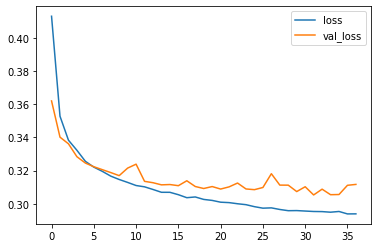

In [28]:
nn_metrics[['loss', 'val_loss']].plot()

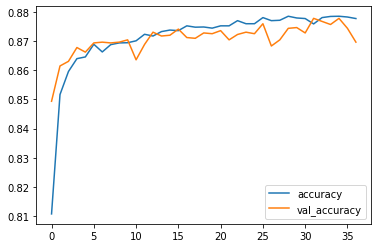

In [29]:
nn_metrics[['accuracy', 'val_accuracy']].plot()

In [30]:
predictions = (model.predict(X_test) > 0.5).astype('int32')


119/119 [==============================] - 0s 1ms/step


In [31]:

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      2466
           1       0.89      0.72      0.79      1338

    accuracy                           0.87      3804
   macro avg       0.88      0.83      0.85      3804
weighted avg       0.87      0.87      0.87      3804



In [33]:
pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 5.2 MB/s 
     |████████████████████████████████| 1.6 MB 50.2 MB/s 


## Hyperparameter Tuning

In [34]:
import keras_tuner
from tensorflow import keras

In [35]:
def build_model(hp):
  model = keras.Sequential()
  model.add(keras.layers.Dense(
      hp.Choice('units', [8, 16, 32]),
      activation='relu'))
  model.add(keras.layers.Dense(1, activation='relu'))
  model.compile(loss='mse')
  return model

In [36]:
tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5)

In [37]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))
best_model = tuner.get_best_models()[0]

Trial 2 Complete [00h 00m 06s]
val_loss: 0.11327335238456726

Best val_loss So Far: 0.11327335238456726
Total elapsed time: 00h 00m 17s
